In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
#importing libraries 

In [2]:
data = pd.read_csv("/Users/tarashabazaz/Downloads/2018_sqf_database-abbr.csv")
#import stop and frisk dataset from the NYPD (2018)

In [3]:
data 
#let's preview the dataset

,STOP_FRISK_ID,Stop Frisk Time,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_RANK,SUPERVISING_OFFICER_COMMAND_CODE,...,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,SUSPECT_HEIGHT,SUSPECT_WEIGHT,SUSPECT_BODY_BUILD_TYPE,SUSPECT_EYE_COLOR,SUSPECT_HAIR_COLOR,STOP_LOCATION_PRECINCT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_BORO_NAME
0,1,19:04:00,2018,January,Monday,Based on C/W on Scene,POM,1,SGT,1,...,MALE,WHITE,5.10,170.0,MED,BRO,BLK,1,VARICK STREET && FRANKLIN STREET,MANHATTAN
1,2,23:00:00,2018,January,Monday,Based on Radio Run,POM,34,SGT,34,...,MALE,BLACK HISPANIC,6.10,250.0,HEA,BRO,BLK,34,DYCKMAN STREET && POST AVENUE,MANHATTAN
2,3,23:55:00,2018,January,Monday,Based on Radio Run,POM,808,SGT,808,...,MALE,WHITE HISPANIC,5.50,150.0,THN,BRO,BLD,43,2245 RANDALL AVENUE,BRONX
3,4,3:23:00,2018,January,Monday,Based on Radio Run,POM,63,SGT,63,...,MALE,AMERICAN INDIAN/ALASKAN NATIVE,5.10,160.0,MED,BRO,BLK,63,EAST 38 STREET && AVENUE L,BROOKLYN
4,5,3:23:00,2018,January,Monday,Based on Radio Run,POM,63,SGT,63,...,MALE,WHITE,5.11,230.0,MED,BRO,BLK,63,EAST 38 STREET && AVENUE L,BROOKLYN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11003,11004,12:43:00,2018,December,Monday,Based on Radio Run,POM,121,SGT,121,...,MALE,BLACK,5.11,170.0,THN,BRO,BLD,121,2321 FOREST AVENUE,STATEN ISLAND
11004,11005,23:20:00,2018,December,Monday,Based on Radio Run,POM,32,LT,32,...,MALE,BLACK HISPANIC,5.10,170.0,THN,BRO,BLK,32,WEST 145 STREET && 7 AVENUE,MANHATTAN
11005,11006,23:20:00,2018,December,Monday,Based on Radio Run,POM,32,LT,32,...,MALE,BLACK HISPANIC,5.40,140.0,THN,BRO,BLK,32,WEST 145 STREET && 7 AVENUE,MANHATTAN
11006,11007,23:20:00,2018,December,Monday,Based on Radio Run,POM,32,LT,32,...,MALE,BLACK HISPANIC,5.40,130.0,THN,BRO,BLK,32,WEST 145 STREET && 7 AVENUE,MANHATTAN


In [4]:
df = data.dropna(subset=['SUSPECT_RACE_DESCRIPTION'])
#dropping any stops that have missing info in the race column

In [5]:
df
#looking at the dataset again, we see we didn't lose any stops and still have 11008 rows

,STOP_FRISK_ID,Stop Frisk Time,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_RANK,SUPERVISING_OFFICER_COMMAND_CODE,...,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,SUSPECT_HEIGHT,SUSPECT_WEIGHT,SUSPECT_BODY_BUILD_TYPE,SUSPECT_EYE_COLOR,SUSPECT_HAIR_COLOR,STOP_LOCATION_PRECINCT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_BORO_NAME
0,1,19:04:00,2018,January,Monday,Based on C/W on Scene,POM,1,SGT,1,...,MALE,WHITE,5.10,170.0,MED,BRO,BLK,1,VARICK STREET && FRANKLIN STREET,MANHATTAN
1,2,23:00:00,2018,January,Monday,Based on Radio Run,POM,34,SGT,34,...,MALE,BLACK HISPANIC,6.10,250.0,HEA,BRO,BLK,34,DYCKMAN STREET && POST AVENUE,MANHATTAN
2,3,23:55:00,2018,January,Monday,Based on Radio Run,POM,808,SGT,808,...,MALE,WHITE HISPANIC,5.50,150.0,THN,BRO,BLD,43,2245 RANDALL AVENUE,BRONX
3,4,3:23:00,2018,January,Monday,Based on Radio Run,POM,63,SGT,63,...,MALE,AMERICAN INDIAN/ALASKAN NATIVE,5.10,160.0,MED,BRO,BLK,63,EAST 38 STREET && AVENUE L,BROOKLYN
4,5,3:23:00,2018,January,Monday,Based on Radio Run,POM,63,SGT,63,...,MALE,WHITE,5.11,230.0,MED,BRO,BLK,63,EAST 38 STREET && AVENUE L,BROOKLYN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11003,11004,12:43:00,2018,December,Monday,Based on Radio Run,POM,121,SGT,121,...,MALE,BLACK,5.11,170.0,THN,BRO,BLD,121,2321 FOREST AVENUE,STATEN ISLAND
11004,11005,23:20:00,2018,December,Monday,Based on Radio Run,POM,32,LT,32,...,MALE,BLACK HISPANIC,5.10,170.0,THN,BRO,BLK,32,WEST 145 STREET && 7 AVENUE,MANHATTAN
11005,11006,23:20:00,2018,December,Monday,Based on Radio Run,POM,32,LT,32,...,MALE,BLACK HISPANIC,5.40,140.0,THN,BRO,BLK,32,WEST 145 STREET && 7 AVENUE,MANHATTAN
11006,11007,23:20:00,2018,December,Monday,Based on Radio Run,POM,32,LT,32,...,MALE,BLACK HISPANIC,5.40,130.0,THN,BRO,BLK,32,WEST 145 STREET && 7 AVENUE,MANHATTAN


In [6]:
df['SUSPECT_RACE_DESCRIPTION'].value_counts()
#see the amount of each race

BLACK                             6241
WHITE HISPANIC                    2411
WHITE                             1074
BLACK HISPANIC                     978
ASIAN / PACIFIC ISLANDER           221
0                                   67
AMERICAN INDIAN/ALASKAN NATIVE      16
Name: SUSPECT_RACE_DESCRIPTION, dtype: int64

In [7]:
df.drop(df[df['SUSPECT_RACE_DESCRIPTION'] == '0'].index, inplace = True)
#because the stops where the race is unknown listed race as "0",not as NaN, I want to drop those with "0"

In [8]:
df['SUSPECT_RACE_DESCRIPTION'].value_counts()
#now we see we've removed the data points with unknown race

BLACK                             6241
WHITE HISPANIC                    2411
WHITE                             1074
BLACK HISPANIC                     978
ASIAN / PACIFIC ISLANDER           221
AMERICAN INDIAN/ALASKAN NATIVE      16
Name: SUSPECT_RACE_DESCRIPTION, dtype: int64

In [9]:
len(df['SUSPECT_RACE_DESCRIPTION'])
#let's see how many stops we are left with 

10941

In [10]:
#determining the proportion of stops that were conducted on Black people: first we need the function 
#to find proportion along with its CI 
def CI_prop(s, n):
    p = s / n
    se2 = p * (1-p) / n
    se = np.sqrt(se2)
    low = p - 1.96 * se
    up = p + 1.96 * se
    print('Sample proportion is:', p)
    print('95% CI is: ({}, {})'.format(low, up))

In [11]:
#the first number is the stops for Black  individuals, then divided by how many stops from 
# len(df['SUSPECT_RACE_DESCRIPTION']) above 
CI_prop(6241, 10941)

Sample proportion is: 0.5704231788684764
95% CI is: (0.5611474816328043, 0.5796988761041485)


In [12]:
#now proportion of stops conducted on Hispanic people (combined white Hispanic and Black Hispanic)
CI_prop(3389, 10941)

Sample proportion is: 0.309752307832922
95% CI is: (0.3010879312610737, 0.31841668440477033)


In [13]:
#now proportion of stops of white individuals 
CI_prop(1074, 10941)

Sample proportion is: 0.0981628735947354
95% CI is: (0.09258761200610752, 0.10373813518336328)


In [14]:
# let's see the rest of the proportions so i can add up the "other" category
# "other" was asian, native, pacific islander, etc
prop = df['SUSPECT_RACE_DESCRIPTION'].value_counts() / 10941
print(prop)

BLACK                             0.570423
WHITE HISPANIC                    0.220364
WHITE                             0.098163
BLACK HISPANIC                    0.089389
ASIAN / PACIFIC ISLANDER          0.020199
AMERICAN INDIAN/ALASKAN NATIVE    0.001462
Name: SUSPECT_RACE_DESCRIPTION, dtype: float64


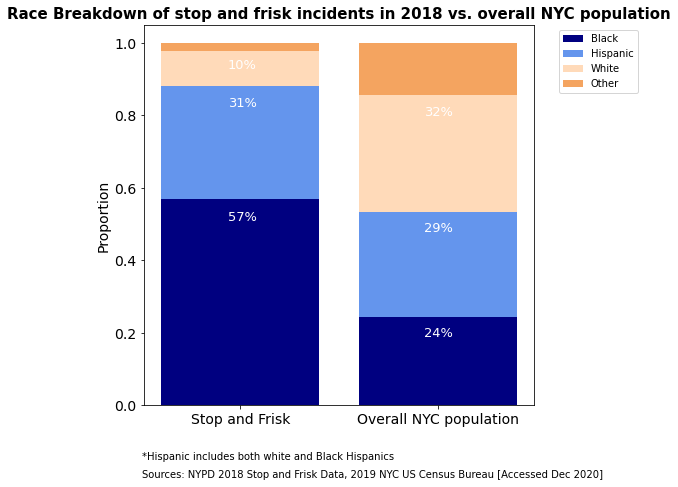

In [15]:
#now we make a stacked bar chart to show the difference in race breakdown among the stop and frisk policy vs. the actual NYC population

import matplotlib.pyplot as plt

label = ['Stop and Frisk', 'Overall NYC population']
y_value1 = [0.570423, 0.243] #Black. the first proportion is from the stop and frisk dataframe, the 2nd provided by 2019 census info
y_value2 = [0.309753, 0.291] #Hispanic (combined White and Black Hispanic)
y_value3 = [0.098163, 0.321] #White
y_value4 = [0.021661, 0.145] #Other (combined Asian, Pacific Islander, and Native)
y = np.add(y_value1, y_value2)
fig, axs = plt.subplots(figsize=(7,7))       
p1 = axs.bar(label, y_value1, color = "navy")     

p2 = axs.bar(label, y_value2, bottom= y_value1, color="cornflowerblue")
p3 = axs.bar(label, y_value3, bottom= np.add(y_value1, y_value2), color = "peachpuff")
p4 = axs.bar(label, y_value4, bottom= np.add(y, y_value3), color = "sandybrown")

axs.set_title("Race Breakdown of stop and frisk incidents in 2018 vs. overall NYC population", 
              fontsize=15, fontweight="bold")   
axs.set_xlabel("", fontsize=14)
axs.set_ylabel("Proportion", fontsize=14)
axs.tick_params(labelsize=14)  
axs.legend((p1[0],p2[0], p3[0], p4[0]), ('Black', 'Hispanic', 'White', 'Other'),
          bbox_to_anchor=(1.05, 1))
plt.text(x = -0.5, y= -0.2, s="Sources: NYPD 2018 Stop and Frisk Data, 2019 NYC US Census Bureau [Accessed Dec 2020]")
plt.text(x = -0.5, y =-0.15, s="*Hispanic includes both white and Black Hispanics")
plt.text(x = -0.065, y = 0.51, s = "57%", color="white", fontsize=13)
plt.text(x = -0.065, y = 0.825, s = "31%", color="white", fontsize=13)
plt.text(x = -0.065, y = 0.93, s = "10%", color="white", fontsize=13)
plt.text(x = 0.93, y = 0.19, s = "24%", color="white", fontsize=13)
plt.text(x = 0.93, y = 0.48, s = "29%", color="white", fontsize=13)
plt.text(x = 0.93, y = 0.8, s = "32%", color="white", fontsize=13)
plt.show() 

In [16]:
#moving onto the next analysis, we want to look at time stopped vs. race 
timestopped = df[['SUSPECT_RACE_DESCRIPTION', 'STOP_DURATION_MINUTES']]
timestopped

,SUSPECT_RACE_DESCRIPTION,STOP_DURATION_MINUTES
0,WHITE,18
1,BLACK HISPANIC,15
2,WHITE HISPANIC,10
3,AMERICAN INDIAN/ALASKAN NATIVE,15
4,WHITE,15
...,...,...
11003,BLACK,8
11004,BLACK HISPANIC,25
11005,BLACK HISPANIC,25
11006,BLACK HISPANIC,25


In [17]:
#making sure to drop NaNs just in case in these two columns 
timestopped = timestopped.dropna()
timestopped

,SUSPECT_RACE_DESCRIPTION,STOP_DURATION_MINUTES
0,WHITE,18
1,BLACK HISPANIC,15
2,WHITE HISPANIC,10
3,AMERICAN INDIAN/ALASKAN NATIVE,15
4,WHITE,15
...,...,...
11003,BLACK,8
11004,BLACK HISPANIC,25
11005,BLACK HISPANIC,25
11006,BLACK HISPANIC,25


In [18]:
#creating conditions separated by race 
blacktime = timestopped['SUSPECT_RACE_DESCRIPTION'] == 'BLACK'
whispanictime = timestopped['SUSPECT_RACE_DESCRIPTION'] == 'WHITE HISPANIC'
bhispanictime = timestopped['SUSPECT_RACE_DESCRIPTION'] == 'BLACK HISPANIC'
whitetime = timestopped['SUSPECT_RACE_DESCRIPTION'] == 'WHITE'

In [19]:
#creating separate dataframes based on the conditions 
bt_df = timestopped[blacktime]
bht_df = timestopped[bhispanictime] 
wht_df = timestopped[whispanictime]
wt_df = timestopped[whitetime]

In [20]:
#defining the function for getting sample mean and the 95% confidence interval
def CI_mean(data):
    se = np.std(data)/np.sqrt(len(data))
    low = np.mean(data)-1.96*se
    up = np.mean(data)+1.96*se
    print("Average is:", np.mean(data))
    print("95% CI of mean is: ({}, {})".format(low,up))

In [21]:
#CI for mean stopped time for Black ppl
CI_mean(bt_df['STOP_DURATION_MINUTES'])

Average is: 11.227367409069059
95% CI of mean is: (10.734913839756663, 11.719820978381454)


In [22]:
#CI for mean stopped time for white ppl
CI_mean(wt_df['STOP_DURATION_MINUTES'])

Average is: 12.943202979515828
95% CI of mean is: (12.020434014406797, 13.865971944624858)


In [23]:
#CI for mean stopped time for Black Hispanic ppl
CI_mean(bht_df['STOP_DURATION_MINUTES'])

Average is: 11.474437627811861
95% CI of mean is: (10.36540628139401, 12.583468974229712)


In [24]:
#CI for mean stopped time for white Hispanic ppl
CI_mean(wht_df['STOP_DURATION_MINUTES'])

Average is: 11.681045209456657
95% CI of mean is: (10.904992201524566, 12.457098217388749)


In [25]:
#now I want to define the function for the mean difference in time stopped + 95% CI
def CI_mean_diff(list1, list2):
    s1 = np.var(list1)
    s2 = np.var(list2)
    n1 = len(list1)
    n2 = len(list2)
    se2 = s1/n1 + s2/n2
    se = np.sqrt(se2)

    diff = np.mean(list1) - np.mean(list2)
    low = diff - 1.96 * se
    up = diff + 1.96 * se
    print("The average difference is:", diff)
    print("The 95% CI is: ({}, {})".format(low, up))

In [26]:
CI_mean_diff(bt_df['STOP_DURATION_MINUTES'], wt_df['STOP_DURATION_MINUTES'])
#mean diff in time stopped: Black - White

The average difference is: -1.7158355704467692
The 95% CI is: (-2.761786372777792, -0.6698847681157463)


In [27]:
CI_mean_diff(wht_df['STOP_DURATION_MINUTES'], wt_df['STOP_DURATION_MINUTES'])
#mean diff in time stopped: White Hispanic - White

The average difference is: -1.2621577700591704
The 95% CI is: (-2.4678778180341716, -0.056437722084169195)


In [28]:
CI_mean_diff(bht_df['STOP_DURATION_MINUTES'], wt_df['STOP_DURATION_MINUTES'])
#mean diff in time stopped: Black Hispanic - White 

The average difference is: -1.4687653517039667
The 95% CI is: (-2.9114895423605818, -0.02604116104735188)


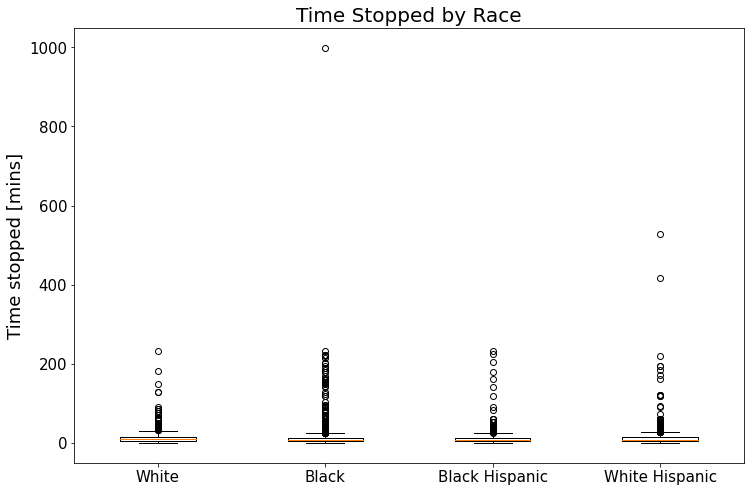

In [29]:
#let's show the time stopped for each race we are comparing 
fig, axs = plt.subplots(figsize=(12,8))
axs.boxplot([wt_df['STOP_DURATION_MINUTES'], bt_df['STOP_DURATION_MINUTES'], bht_df['STOP_DURATION_MINUTES'], wht_df['STOP_DURATION_MINUTES']])
plt.title('Time Stopped by Race', fontsize=20)
axs.set_xticklabels(['White', 'Black', 'Black Hispanic', 'White Hispanic'])
axs.set_ylabel('Time stopped [mins]', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

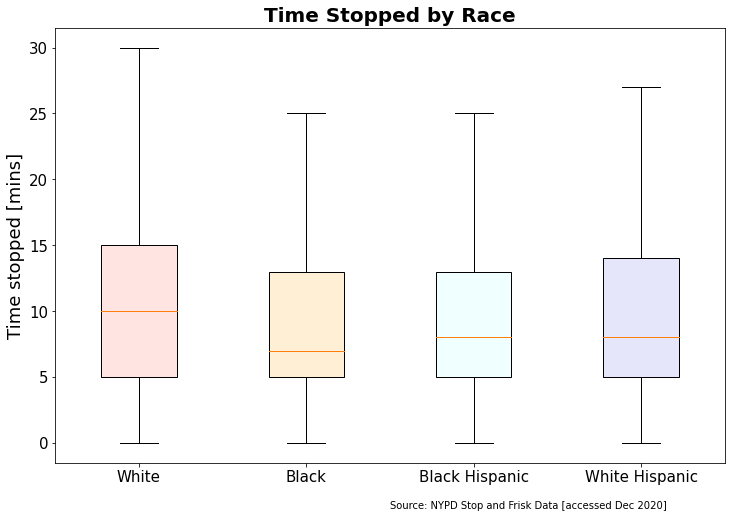

In [30]:
#since the outliers are really distorting the boxplot and making it hard to see the ditribution, i'm going to remove them
fig, axs = plt.subplots(figsize=(12,8))
box = axs.boxplot([wt_df['STOP_DURATION_MINUTES'], bt_df['STOP_DURATION_MINUTES'], bht_df['STOP_DURATION_MINUTES'], wht_df['STOP_DURATION_MINUTES']], showfliers=False, patch_artist=True)
plt.title('Time Stopped by Race', fontsize=20, fontweight="bold")
axs.set_xticklabels(['White', 'Black', 'Black Hispanic', 'White Hispanic'])
axs.set_ylabel('Time stopped [mins]', fontsize=18)
axs.tick_params(labelsize=15)
plt.text(x = 2.5, y= -5, s="Source: NYPD Stop and Frisk Data [accessed Dec 2020]")
colors = ['mistyrose', 'papayawhip', 'azure', 'lavender']
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

In [31]:
#next, let's conduct a chi squared test testing the association between frisking and race 
# new subset of data with only the frisk and race columns, drop NaNs
chi = df[['FRISKED_FLAG', 'SUSPECT_RACE_DESCRIPTION']]
chi.dropna()

,FRISKED_FLAG,SUSPECT_RACE_DESCRIPTION
0,1,WHITE
1,1,BLACK HISPANIC
2,1,WHITE HISPANIC
3,1,AMERICAN INDIAN/ALASKAN NATIVE
4,1,WHITE
...,...,...
11003,1,BLACK
11004,0,BLACK HISPANIC
11005,0,BLACK HISPANIC
11006,0,BLACK HISPANIC


In [32]:
#let's make a two way table of this data
table = pd.crosstab(index=chi["SUSPECT_RACE_DESCRIPTION"], columns=chi["FRISKED_FLAG"]) 
table

FRISKED_FLAG,0,1
SUSPECT_RACE_DESCRIPTION,,
AMERICAN INDIAN/ALASKAN NATIVE,6,10
ASIAN / PACIFIC ISLANDER,106,115
BLACK,2355,3886
BLACK HISPANIC,399,579
WHITE,607,467
WHITE HISPANIC,986,1425


In [33]:
#making sure what the total count of data points is 
import numpy as np
total = 0
for race in table.columns:
    total += np.sum(table[race])
print(total)

10941


In [34]:
#now want to make the table a bit more clear and rename the columns
table.columns = ['no frisk', 'frisk']
table

,no frisk,frisk
SUSPECT_RACE_DESCRIPTION,,
AMERICAN INDIAN/ALASKAN NATIVE,6,10
ASIAN / PACIFIC ISLANDER,106,115
BLACK,2355,3886
BLACK HISPANIC,399,579
WHITE,607,467
WHITE HISPANIC,986,1425


In [35]:
# add a new column for the totals of each race
table['Total'] = table['frisk'] + table['no frisk']
table

,no frisk,frisk,Total
SUSPECT_RACE_DESCRIPTION,,,
AMERICAN INDIAN/ALASKAN NATIVE,6,10,16
ASIAN / PACIFIC ISLANDER,106,115,221
BLACK,2355,3886,6241
BLACK HISPANIC,399,579,978
WHITE,607,467,1074
WHITE HISPANIC,986,1425,2411


In [36]:
#CI for proportion of Black ppl frisked
CI_prop(3886, 6241)

Sample proportion is: 0.6226566255407787
95% CI is: (0.610630613028921, 0.6346826380526365)


In [37]:
#CI for proportion of white ppl frisked
CI_prop(467, 1074)

Sample proportion is: 0.43482309124767227
95% CI is: (0.40517461111095204, 0.4644715713843925)


In [38]:
#functions for finding a proportion difference, plus the confidence interval
def CI_prop_diff(s1, s2, n1, n2):
    p1 = s1 / n1
    p2 = s2 / n2
    se2p1 = p1 * (1 - p1) / n1
    se2p2 = p2 * (1 - p2) / n2
    se2 = se2p1 + se2p2
    se = np.sqrt(se2)
    low = (p1 - p2) - 1.96 * se
    up = (p1 - p2) + 1.96 * se
    print("Proportion difference is:", p1 - p2)
    print("95% CI is: ({}, {})".format(low, up))

In [39]:
#i am ONLY calculating the diff in proportion of stopped Black individuals who were frisked - prop of stopped whites who were frisked 
CI_prop_diff(3886, 467, 6241, 1074)

Proportion difference is: 0.18783353429310645
95% CI is: (0.1558388886261694, 0.2198281799600435)


In [40]:
#now let's make a grouped bar chart, first by adding columns for the proportions of frisked and not frisked per race
table['nofrisk_per'] = table['no frisk'] / table['Total']
table['frisk_per'] = table['frisk'] / table['Total']
table

,no frisk,frisk,Total,nofrisk_per,frisk_per
SUSPECT_RACE_DESCRIPTION,,,,,
AMERICAN INDIAN/ALASKAN NATIVE,6,10,16,0.375000,0.625000
ASIAN / PACIFIC ISLANDER,106,115,221,0.479638,0.520362
BLACK,2355,3886,6241,0.377343,0.622657
BLACK HISPANIC,399,579,978,0.407975,0.592025
WHITE,607,467,1074,0.565177,0.434823
WHITE HISPANIC,986,1425,2411,0.408959,0.591041


In [41]:
#I don't care about the Asian and Native data, so I will remove it for the data visual.
table.drop(["ASIAN / PACIFIC ISLANDER", "AMERICAN INDIAN/ALASKAN NATIVE"], axis=0, inplace=True)
table

,no frisk,frisk,Total,nofrisk_per,frisk_per
SUSPECT_RACE_DESCRIPTION,,,,,
BLACK,2355,3886,6241,0.377343,0.622657
BLACK HISPANIC,399,579,978,0.407975,0.592025
WHITE,607,467,1074,0.565177,0.434823
WHITE HISPANIC,986,1425,2411,0.408959,0.591041


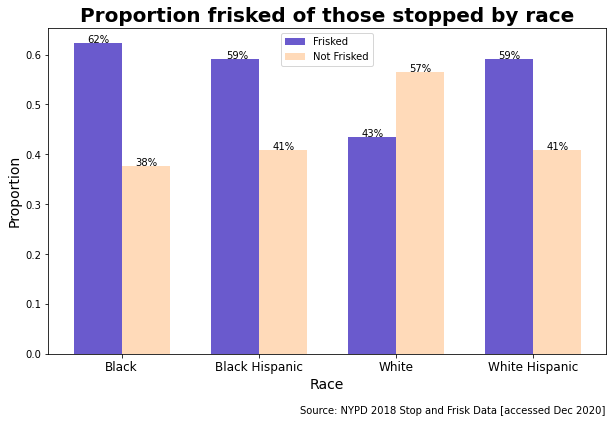

In [42]:
#now let's make a grouped bar chart
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['Black', 'Black Hispanic', 'White', 'White Hispanic']
y_value1 = table['frisk_per'] # List of y-values from 1st category
y_value2 = table['nofrisk_per'] # List of y-values from 2nd category

x = np.arange(len(labels))
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x - width/2, y_value1, width, label='Frisked', color='slateblue')
ax.bar(x + width/2, y_value2, width, label='Not Frisked', color='peachpuff')


ax.set_ylabel('Proportion', fontsize=14)
ax.set_xlabel('Race', fontsize=14)
ax.set_title('Proportion frisked of those stopped by race',
             fontsize=20, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend()
plt.text(x = 1.3, y= -0.12, s="Source: NYPD 2018 Stop and Frisk Data [accessed Dec 2020]")
plt.text(x=-0.25, y=0.625, s="62%")
plt.text(x=0.1, y=0.378, s="38%")
plt.text(x=0.76, y=0.593, s="59%")
plt.text(x= 1.1, y=0.41, s="41%")
plt.text(x=1.75, y=0.435, s="43%")
plt.text(x=2.1, y=0.565, s="57%")
plt.text(x=2.75, y=0.593, s="59%")
plt.text(x=3.1, y=0.41, s="41%")

plt.show()

In [43]:
#let's move on to the regression analysis. i'll pull two columns from the original dataset 
# to see if there is any association between stop duration time and age of suspect.
# I removed NaNs and 0s from the age column
reg = df[['SUSPECT_REPORTED_AGE', 'STOP_DURATION_MINUTES']]
reg.dropna()
reg.drop(reg[reg['SUSPECT_REPORTED_AGE'] == 0].index, inplace = True)


/Users/tarashabazaz/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


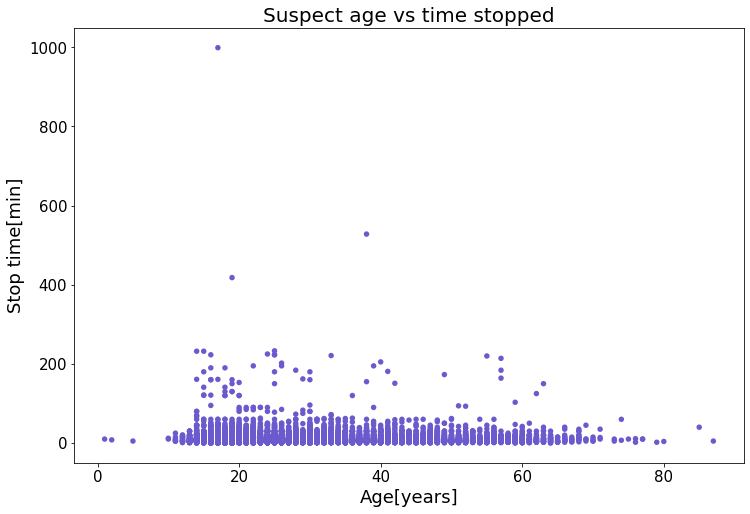

In [44]:
#let's make a scatterplot to visualize the association between the two variables
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(reg['SUSPECT_REPORTED_AGE'], reg['STOP_DURATION_MINUTES'], c='slateblue',
            edgecolors='none', s=30)
plt.title("Suspect age vs time stopped", fontsize=20)
axs.set_xlabel("Age[years]", fontsize=18)
axs.set_ylabel("Stop time[min]", fontsize=18)
axs.tick_params(labelsize=15)
plt.show() 

In [45]:
#now see the full regression model (linear regression)
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

x_vals = reg['SUSPECT_REPORTED_AGE'].values
y_vals = reg['STOP_DURATION_MINUTES']

reg_model = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     STOP_DURATION_MINUTES   R-squared:                       0.000
Model:                               OLS   Adj. R-squared:                  0.000
Method:                    Least Squares   F-statistic:                     1.688
Date:                   Tue, 22 Dec 2020   Prob (F-statistic):              0.194
Time:                           17:08:09   Log-Likelihood:                -44626.
No. Observations:                  10174   AIC:                         8.926e+04
Df Residuals:                      10172   BIC:                         8.927e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3418      0.499     24.715      0.000      11.363      13.321
x1            -0.0204      0.016     -1.299      0.194      -0.051       0.010
==============================================================================
Omnibus:                    22070.121   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        238079515.228
Skew:                          19.138   Prob(JB):                         0.00
Kurtosis:                     751.434   Cond. No.                         82.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
#time = 12.3418 -0.0204(age) 
#getting the regression coefficients
b0 = reg_model.params[0]
b1 = reg_model.params[1]
x_plot = np.linspace(np.min(reg['SUSPECT_REPORTED_AGE']),
                     np.max(reg['SUSPECT_REPORTED_AGE']), 100)

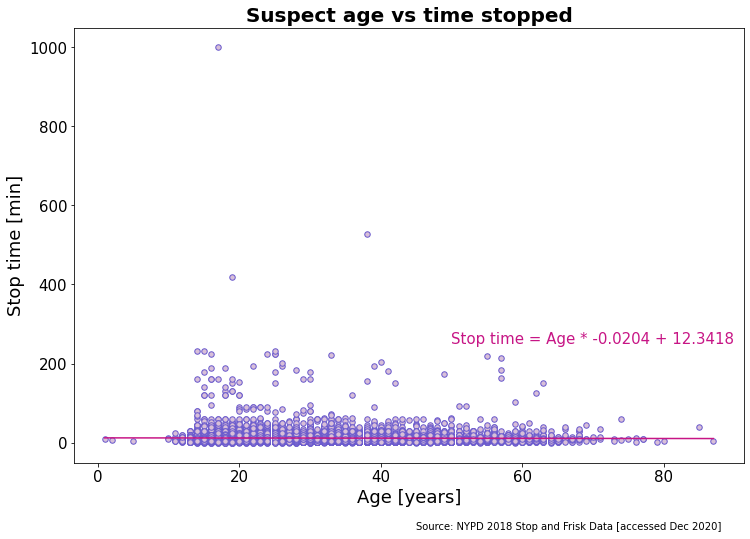

In [47]:
#adding regression line and label to the scatterplot 
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(reg['SUSPECT_REPORTED_AGE'], reg['STOP_DURATION_MINUTES'], c='thistle',
            edgecolors='slateblue', s=30)
plt.title("Suspect age vs time stopped", fontsize=20, fontweight="bold")
axs.set_xlabel("Age [years]", fontsize=18)
axs.set_ylabel("Stop time [min]", fontsize=18)
axs.tick_params(labelsize=15)
axs.plot(x_plot, x_plot*b1 + b0, color='mediumvioletred')
plt.text(50,250, "Stop time = Age * -0.0204 + 12.3418",
        fontsize=15, color='mediumvioletred')
plt.text(x = 45, y= -220, s="Source: NYPD 2018 Stop and Frisk Data [accessed Dec 2020]")
plt.show() 

In [48]:
#another chi square test assessing the association between race and arrest. we retrieve the 2 columns for race and arrest
# and drop nans again. (already dropped race=0 in original df)
chi2 = df[['SUSPECT_RACE_DESCRIPTION', 'SUSPECT_ARRESTED_FLAG']]
chi2.dropna()

,SUSPECT_RACE_DESCRIPTION,SUSPECT_ARRESTED_FLAG
0,WHITE,0
1,BLACK HISPANIC,0
2,WHITE HISPANIC,0
3,AMERICAN INDIAN/ALASKAN NATIVE,1
4,WHITE,1
...,...,...
11003,BLACK,1
11004,BLACK HISPANIC,0
11005,BLACK HISPANIC,0
11006,BLACK HISPANIC,0


In [49]:
#making a two way table 
table2 = pd.crosstab(index=chi2["SUSPECT_ARRESTED_FLAG"], columns=chi2["SUSPECT_RACE_DESCRIPTION"]) 
table2

SUSPECT_RACE_DESCRIPTION,AMERICAN INDIAN/ALASKAN NATIVE,ASIAN / PACIFIC ISLANDER,BLACK,BLACK HISPANIC,WHITE,WHITE HISPANIC
SUSPECT_ARRESTED_FLAG,,,,,,
0,12,170,4532,726,771,1628
1,4,51,1709,252,303,783


In [50]:
#renaming the rows to be more clear
table2.index = ['no arrest', 'arrest']
table2

SUSPECT_RACE_DESCRIPTION,AMERICAN INDIAN/ALASKAN NATIVE,ASIAN / PACIFIC ISLANDER,BLACK,BLACK HISPANIC,WHITE,WHITE HISPANIC
no arrest,12,170,4532,726,771,1628
arrest,4,51,1709,252,303,783


In [51]:
# adding new total row 
table2.loc['Total'] = table2.loc['no arrest'] + table2.loc['arrest']
table2

SUSPECT_RACE_DESCRIPTION,AMERICAN INDIAN/ALASKAN NATIVE,ASIAN / PACIFIC ISLANDER,BLACK,BLACK HISPANIC,WHITE,WHITE HISPANIC
no arrest,12,170,4532,726,771,1628
arrest,4,51,1709,252,303,783
Total,16,221,6241,978,1074,2411


In [52]:
#adding row for percentage arrested of stops 
table2.loc['arrest_per'] = table2.loc['arrest'] / table2.loc['Total']
table2

SUSPECT_RACE_DESCRIPTION,AMERICAN INDIAN/ALASKAN NATIVE,ASIAN / PACIFIC ISLANDER,BLACK,BLACK HISPANIC,WHITE,WHITE HISPANIC
no arrest,12.00,170.000000,4532.000000,726.000000,771.000000,1628.000000
arrest,4.00,51.000000,1709.000000,252.000000,303.000000,783.000000
Total,16.00,221.000000,6241.000000,978.000000,1074.000000,2411.000000
arrest_per,0.25,0.230769,0.273834,0.257669,0.282123,0.324762


In [53]:
#seeing overall proportion of those arrested 
CI_prop(3102, 10941)

Sample proportion is: 0.2835207019468056
95% CI is: (0.27507527181754243, 0.2919661320760688)


In [54]:
#CI for black proportion arrested 
CI_prop(1709, 6241)

Sample proportion is: 0.2738343214228489
95% CI is: (0.262770866277214, 0.2848977765684838)


In [55]:
#CI for white proportion arrested
CI_prop(303, 1074)

Sample proportion is: 0.28212290502793297
95% CI is: (0.25520767148156803, 0.3090381385742979)


In [56]:
# CI for white hispanic arrested
CI_prop(783, 2411)

Sample proportion is: 0.32476150974699297
95% CI is: (0.3060689689536044, 0.34345405054038153)


In [57]:
# CI for asian arrested
CI_prop(51, 221)

Sample proportion is: 0.23076923076923078
95% CI is: (0.17522010741077387, 0.2863183541276877)


In [58]:
#black - white arrested
CI_prop_diff(1709, 303, 6241, 1074)

Proportion difference is: -0.008288583605084054
95% CI is: (-0.03738892443839462, 0.020811757228226514)


In [59]:
#white hispanic - white arrested
CI_prop_diff(783, 303, 2411, 1074)

Proportion difference is: 0.04263860471906
95% CI is: (0.009869093307263481, 0.07540811613085652)


In [60]:
#black hispanic - white arrested
CI_prop_diff(252, 303, 978, 1074)

Proportion difference is: -0.02445419337149124
95% CI is: (-0.06286985780027612, 0.013961471057293638)


In [61]:
#black - asian arrested
CI_prop_diff(1709, 51, 6241, 221)

Proportion difference is: 0.04306509065361813
95% CI is: (-0.013575046578317825, 0.09970522788555408)


In [62]:
#white - asian arrested
CI_prop_diff(303, 51, 1074, 221)

Proportion difference is: 0.05135367425870219
95% CI is: (-0.010372615948537944, 0.11307996446594232)


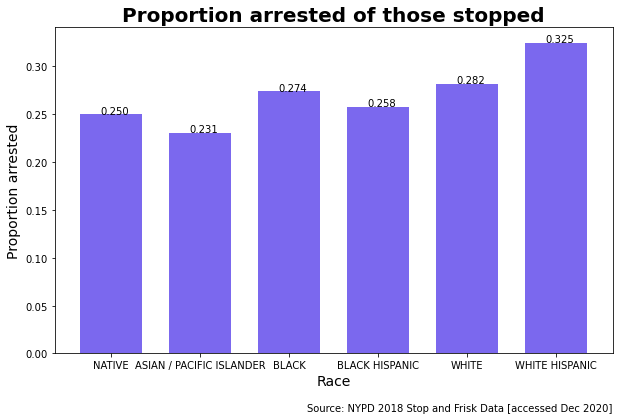

In [63]:
#making bar chart of proportion arrested by race
x_values = ['NATIVE', 'ASIAN / PACIFIC ISLANDER', 'BLACK', 'BLACK HISPANIC', 'WHITE', 'WHITE HISPANIC']
y_values = table2.loc['arrest_per']

fig, axs = plt.subplots(figsize=(10, 6)) # Change the figure size here       
axs.bar(x_values, y_values, color=('mediumslateblue'), width=0.7) # You specify the color here     
axs.set_title("Proportion arrested of those stopped", fontsize=20, fontweight="bold")   
axs.set_xlabel("Race", fontsize=14)
axs.set_ylabel("Proportion arrested", fontsize=14)
axs.tick_params(labelsize=10) 

plt.text(x=-0.125, y=0.25, s="0.250")
plt.text(x=0.875, y=0.231, s="0.231")
plt.text(x=1.875, y=0.274, s="0.274")
plt.text(x=2.875, y=0.259, s="0.258")
plt.text(x=3.875, y=0.283, s="0.282")
plt.text(x=4.875, y=0.326, s="0.325")

plt.text(x=2.2, y=-.06, s="Source: NYPD 2018 Stop and Frisk Data [accessed Dec 2020]")
plt.show() 

In [64]:
#now retrieving data for physical restraint and race for a new chi test
force = df[['SUSPECT_RACE_DESCRIPTION', 'PHYSICAL_FORCE_RESTRAINT_USED_FLAG']]
force.dropna()
force

,SUSPECT_RACE_DESCRIPTION,PHYSICAL_FORCE_RESTRAINT_USED_FLAG
0,WHITE,0
1,BLACK HISPANIC,0
2,WHITE HISPANIC,0
3,AMERICAN INDIAN/ALASKAN NATIVE,1
4,WHITE,1
...,...,...
11003,BLACK,0
11004,BLACK HISPANIC,0
11005,BLACK HISPANIC,0
11006,BLACK HISPANIC,0


In [65]:
#making a new two way table of physical restraint and race
table5 = pd.crosstab(columns=force["SUSPECT_RACE_DESCRIPTION"], index=force["PHYSICAL_FORCE_RESTRAINT_USED_FLAG"])
table5

SUSPECT_RACE_DESCRIPTION,AMERICAN INDIAN/ALASKAN NATIVE,ASIAN / PACIFIC ISLANDER,BLACK,BLACK HISPANIC,WHITE,WHITE HISPANIC
PHYSICAL_FORCE_RESTRAINT_USED_FLAG,,,,,,
0,15,220,6052,959,1051,2365
1,1,1,189,19,23,46


In [66]:
#renaming the rows 
table5.index = ['no restraint', 'restraint']
table5

SUSPECT_RACE_DESCRIPTION,AMERICAN INDIAN/ALASKAN NATIVE,ASIAN / PACIFIC ISLANDER,BLACK,BLACK HISPANIC,WHITE,WHITE HISPANIC
no restraint,15,220,6052,959,1051,2365
restraint,1,1,189,19,23,46


In [67]:
#new columns for the total and for percentage restrained 
table5.loc['Total'] = table5.loc['no restraint'] + table5.loc['restraint']
table5.loc['restraint_per'] = table5.loc['restraint'] / table5.loc['Total'] 
table5

SUSPECT_RACE_DESCRIPTION,AMERICAN INDIAN/ALASKAN NATIVE,ASIAN / PACIFIC ISLANDER,BLACK,BLACK HISPANIC,WHITE,WHITE HISPANIC
no restraint,15.0000,220.000000,6052.000000,959.000000,1051.000000,2365.000000
restraint,1.0000,1.000000,189.000000,19.000000,23.000000,46.000000
Total,16.0000,221.000000,6241.000000,978.000000,1074.000000,2411.000000
restraint_per,0.0625,0.004525,0.030284,0.019427,0.021415,0.019079


In [68]:
#black restraint proportion 
CI_prop(189, 6241)

Sample proportion is: 0.03028360839609037
95% CI is: (0.0260319813680299, 0.03453523542415084)


In [69]:
#white restraint proportion
CI_prop(23, 1074)

Sample proportion is: 0.021415270018621976
95% CI is: (0.012757322970748138, 0.030073217066495815)


In [70]:
#asian restraint proportion
CI_prop(1, 221)

Sample proportion is: 0.004524886877828055
95% CI is: (-0.004323803543896737, 0.013373577299552845)


In [71]:
#black-white restraint proportions
CI_prop_diff(189, 23, 6241, 1074)

Proportion difference is: 0.008868338377468393
95% CI is: (-0.0007771983867309751, 0.01851387514166776)


In [72]:
#asian - black restraint proportions
CI_prop_diff(1, 189, 221, 6241)

Proportion difference is: -0.025758721518262313
95% CI is: (-0.0355758318143351, -0.015941611222189525)


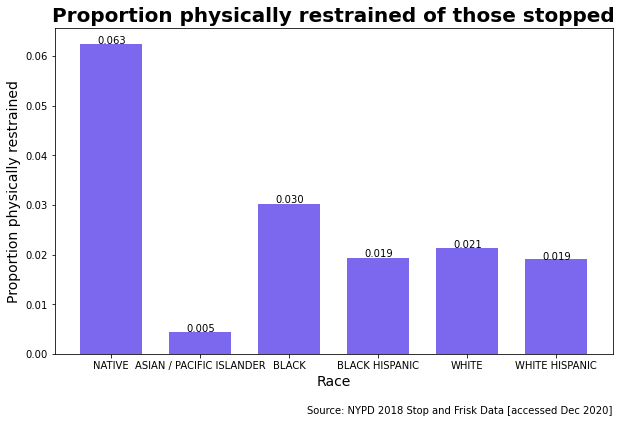

In [73]:
#bar chart of physical restraint race breakdown
x_values = ['NATIVE', 'ASIAN / PACIFIC ISLANDER', 'BLACK', 'BLACK HISPANIC', 'WHITE', 'WHITE HISPANIC']
y_values = table5.loc['restraint_per']

fig, axs = plt.subplots(figsize=(10, 6)) # Change the figure size here       
axs.bar(x_values, y_values, color=('mediumslateblue'), width=0.7) # You specify the color here     
axs.set_title("Proportion physically restrained of those stopped", fontsize=20, fontweight="bold")   
axs.set_xlabel("Race", fontsize=14)
axs.set_ylabel("Proportion physically restrained", fontsize=14)
axs.tick_params(labelsize=10) 

plt.text(x=-0.15, y=0.0625, s="0.063")
plt.text(x=0.85, y=0.0045, s="0.005")
plt.text(x=1.85, y=0.0305, s="0.030")
plt.text(x=2.85, y=0.0195, s="0.019")
plt.text(x=3.85, y=0.0215, s="0.021")
plt.text(x=4.85, y=0.019, s="0.019")
plt.text(x=2.2, y=-.012, s="Source: NYPD 2018 Stop and Frisk Data [accessed Dec 2020]")
plt.show() 

In [74]:
#retrieving two columns again for new chi test: suspected crime and race
crime = df[['SUSPECTED_CRIME_DESCRIPTION', 'SUSPECT_RACE_DESCRIPTION']]
crime.dropna()

,SUSPECTED_CRIME_DESCRIPTION,SUSPECT_RACE_DESCRIPTION
0,MENACING,WHITE
1,CPW,BLACK HISPANIC
2,GRAND LARCENY,WHITE HISPANIC
3,ROBBERY,AMERICAN INDIAN/ALASKAN NATIVE
4,ROBBERY,WHITE
...,...,...
11003,ROBBERY,BLACK
11004,PETIT LARCENY,BLACK HISPANIC
11005,PETIT LARCENY,BLACK HISPANIC
11006,PETIT LARCENY,BLACK HISPANIC


In [75]:
#let's see all the crimes listed
crime['SUSPECTED_CRIME_DESCRIPTION'].value_counts()
#CPW = criminal possession of a weapon
#CPSP = criminal possession of stolen property 

CPW                                            2940
ROBBERY                                        1597
ASSAULT                                        1479
PETIT LARCENY                                  1006
BURGLARY                                        839
OTHER                                           520
CRIMINAL TRESPASS                               480
GRAND LARCENY                                   440
GRAND LARCENY AUTO                              347
CRIMINAL POSSESSION OF MARIHUANA                251
MENACING                                        221
CRIMINAL MISCHIEF                               191
CRIMINAL POSSESSION OF CONTROLLED SUBSTANCE      83
UNAUTHORIZED USE OF A VEHICLE                    82
CRIMINAL SALE OF CONTROLLED SUBSTANCE            82
RECKLESS ENDANGERMENT                            58
CPSP                                             56
AUTO STRIPPIG                                    48
MAKING GRAFFITI                                  42
FORCIBLE TOU

In [76]:
#two way table of suspected crimes and race
ctable = pd.crosstab(columns=crime['SUSPECTED_CRIME_DESCRIPTION'], index=crime['SUSPECT_RACE_DESCRIPTION'])
ctable

SUSPECTED_CRIME_DESCRIPTION,ASSAULT,AUTO STRIPPIG,BURGLARY,CPSP,CPW,CRIMINAL MISCHIEF,CRIMINAL POSSESSION OF CONTROLLED SUBSTANCE,CRIMINAL POSSESSION OF FORGED INSTRUMENT,CRIMINAL POSSESSION OF MARIHUANA,CRIMINAL SALE OF CONTROLLED SUBSTANCE,...,MURDER,OTHER,PETIT LARCENY,PROSTITUTION,RAPE,RECKLESS ENDANGERMENT,ROBBERY,TERRORISM,THEFT OF SERVICES,UNAUTHORIZED USE OF A VEHICLE
SUSPECT_RACE_DESCRIPTION,,,,,,,,,,,,,,,,,,,,,
AMERICAN INDIAN/ALASKAN NATIVE,0,0,1,0,2,3,0,0,0,0,...,0,2,1,0,0,0,1,0,0,0
ASIAN / PACIFIC ISLANDER,37,0,34,1,37,4,2,4,3,1,...,0,9,16,1,4,0,25,1,1,0
BLACK,829,23,361,25,1926,91,36,12,132,38,...,14,266,580,5,7,42,947,0,19,31
BLACK HISPANIC,160,4,74,3,233,18,4,0,30,5,...,1,57,69,0,4,4,135,0,2,5
WHITE,113,7,175,6,171,22,18,3,7,13,...,2,66,159,3,0,0,105,7,10,16
WHITE HISPANIC,340,14,194,21,571,53,23,1,79,25,...,5,120,181,6,5,12,384,0,2,30


In [77]:
#new columns: total, proportion of stops suspected of marijuana possession, and proportion of stops suspected of menacing
ctable['Total'] = [16, 221, 6241, 978, 1074, 2411]
ctable['mj_per'] = ctable['CRIMINAL POSSESSION OF MARIHUANA'] / ctable['Total']
ctable['menacing_per'] = ctable['MENACING'] / ctable['Total']
ctable

SUSPECTED_CRIME_DESCRIPTION,ASSAULT,AUTO STRIPPIG,BURGLARY,CPSP,CPW,CRIMINAL MISCHIEF,CRIMINAL POSSESSION OF CONTROLLED SUBSTANCE,CRIMINAL POSSESSION OF FORGED INSTRUMENT,CRIMINAL POSSESSION OF MARIHUANA,CRIMINAL SALE OF CONTROLLED SUBSTANCE,...,PROSTITUTION,RAPE,RECKLESS ENDANGERMENT,ROBBERY,TERRORISM,THEFT OF SERVICES,UNAUTHORIZED USE OF A VEHICLE,Total,mj_per,menacing_per
SUSPECT_RACE_DESCRIPTION,,,,,,,,,,,,,,,,,,,,,
AMERICAN INDIAN/ALASKAN NATIVE,0,0,1,0,2,3,0,0,0,0,...,0,0,0,1,0,0,0,16,0.000000,0.000000
ASIAN / PACIFIC ISLANDER,37,0,34,1,37,4,2,4,3,1,...,1,4,0,25,1,1,0,221,0.013575,0.040724
BLACK,829,23,361,25,1926,91,36,12,132,38,...,5,7,42,947,0,19,31,6241,0.021150,0.020990
BLACK HISPANIC,160,4,74,3,233,18,4,0,30,5,...,0,4,4,135,0,2,5,978,0.030675,0.026585
WHITE,113,7,175,6,171,22,18,3,7,13,...,3,0,0,105,7,10,16,1074,0.006518,0.010242
WHITE HISPANIC,340,14,194,21,571,53,23,1,79,25,...,6,5,12,384,0,2,30,2411,0.032766,0.018250


In [78]:
#mariajuana proportion black
CI_prop(132, 6241)

Sample proportion is: 0.021150456657586924
95% CI is: (0.017580632487716207, 0.02472028082745764)


In [79]:
#marijuana proportion white
CI_prop(7, 1074)

Sample proportion is: 0.006517690875232775
95% CI is: (0.001705078549276904, 0.011330303201188646)


In [80]:
#black hispanic proportion marijuana
CI_prop(30, 978)

Sample proportion is: 0.03067484662576687
95% CI is: (0.01986766164281916, 0.04148203160871458)


In [81]:
#white hispanic proportion marijuana
CI_prop(79, 2411)

Sample proportion is: 0.032766486934881794
95% CI is: (0.025660276328945995, 0.03987269754081759)


In [82]:
#proportion stopped for suspected marijuana possession: black-white
CI_prop_diff(132, 7, 6241, 1074)

Proportion difference is: 0.01463276578235415
95% CI is: (0.008640697524754312, 0.020624834039953986)


In [83]:
#marijuana black hispanic - white
CI_prop_diff(30, 7, 978, 1074)

Proportion difference is: 0.024157155750534096
95% CI is: (0.01232683518617098, 0.03598747631489721)


In [84]:
#marijuana white hispanic - white
CI_prop_diff(79, 7, 2411, 1074)

Proportion difference is: 0.02624879605964902
95% CI is: (0.017666286719376978, 0.03483130539992106)


In [85]:
#proportion menacing black
CI_prop(131, 6241)

Sample proportion is: 0.02099022592533248
95% CI is: (0.017433658467435293, 0.024546793383229664)


In [86]:
#proportion menacing white
CI_prop(11, 1074)

Sample proportion is: 0.010242085661080074
95% CI is: (0.004220475662486049, 0.016263695659674098)


In [87]:
#proportion stopped for menacing: black-white
CI_prop_diff(131, 11, 6241, 1074)

Proportion difference is: 0.010748140264252404
95% CI is: (0.0037546462120821465, 0.01774163431642266)


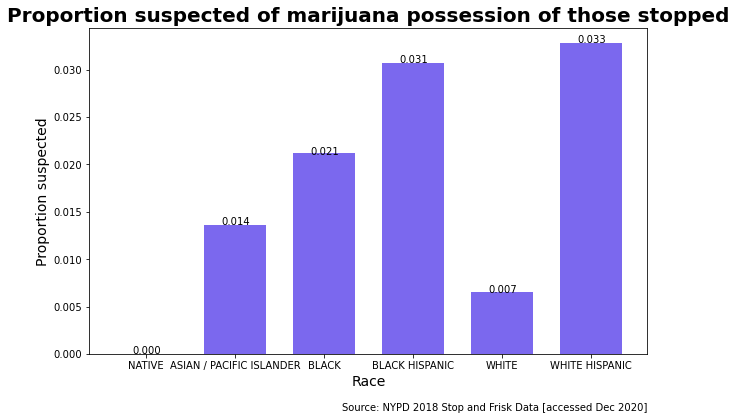

In [88]:
# bar chart of suspected marijuana possession proportions by race 
x_values = ['NATIVE', 'ASIAN / PACIFIC ISLANDER', 'BLACK', 'BLACK HISPANIC', 'WHITE', 'WHITE HISPANIC']
y_values = ctable['mj_per']

fig, axs = plt.subplots(figsize=(10, 6)) # Change the figure size here       
axs.bar(x_values, y_values, color=('mediumslateblue'), width=0.7) # You specify the color here     
axs.set_title("Proportion suspected of marijuana possession of those stopped", fontsize=20, fontweight="bold")   
axs.set_xlabel("Race", fontsize=14)
axs.set_ylabel("Proportion suspected", fontsize=14)
axs.tick_params(labelsize=10) 

plt.text(x=-0.15, y=0, s="0.000")
plt.text(x=0.85, y=0.0136, s="0.014")
plt.text(x=1.85, y=0.021, s="0.021")
plt.text(x=2.85, y=0.0307, s="0.031")
plt.text(x=3.85, y=0.0065, s="0.007")
plt.text(x=4.85, y=0.0328, s="0.033")
plt.text(x=2.2, y=-.006, s="Source: NYPD 2018 Stop and Frisk Data [accessed Dec 2020]")
plt.show() 

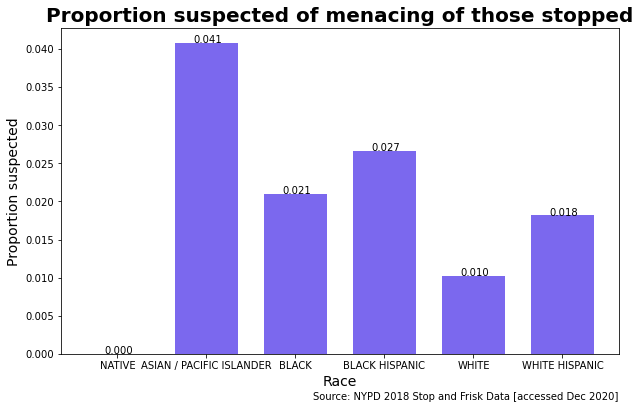

In [89]:
# bar chart of suspected menacing proportions by race 
x_values = ['NATIVE', 'ASIAN / PACIFIC ISLANDER', 'BLACK', 'BLACK HISPANIC', 'WHITE', 'WHITE HISPANIC']
y_values = ctable['menacing_per']

fig, axs = plt.subplots(figsize=(10, 6)) # Change the figure size here       
axs.bar(x_values, y_values, color=('mediumslateblue'), width=0.7) # You specify the color here     
axs.set_title("Proportion suspected of menacing of those stopped", fontsize=20, fontweight="bold")   
axs.set_xlabel("Race", fontsize=14)
axs.set_ylabel("Proportion suspected", fontsize=14)
axs.tick_params(labelsize=10) 

plt.text(x=-0.15, y=0, s="0.000")
plt.text(x=0.85, y=0.0408, s="0.041")
plt.text(x=1.85, y=0.021, s="0.021")
plt.text(x=2.85, y=0.0267, s="0.027")
plt.text(x=3.85, y=0.0103, s="0.010")
plt.text(x=4.85, y=0.0182, s="0.018")
plt.text(x=2.2, y=-.006, s="Source: NYPD 2018 Stop and Frisk Data [accessed Dec 2020]")
plt.show() 

In [90]:
#the final test is on the breakdown of boroughs. i will make a csv from these value counts 
data['STOP_LOCATION_BORO_NAME'].value_counts()

BROOKLYN         3632
MANHATTAN        2857
BRONX            2331
QUEENS           1848
STATEN ISLAND     340
Name: STOP_LOCATION_BORO_NAME, dtype: int64

In [91]:
#uploading csv file i made of the boroughs' stops and overall population
boro = pd.read_csv('/Users/tarashabazaz/Downloads/borough2.csv')
boro

,Unnamed: 0,SAF,Population
0,Brooklyn,3632,2559903
1,Manhattan,2857,1628706
2,Bronx,2331,1418207
3,Queens,1848,2253858
4,Staten Island,340,476143


In [92]:
#renaming columns
boro.columns= ['Borough', 'SAF', 'Population']
boro

,Borough,SAF,Population
0,Brooklyn,3632,2559903
1,Manhattan,2857,1628706
2,Bronx,2331,1418207
3,Queens,1848,2253858
4,Staten Island,340,476143


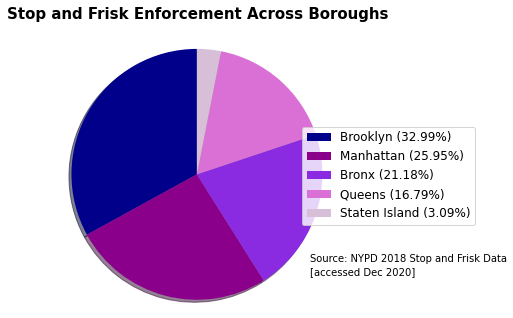

In [93]:
#making pie chart of SAF stops broken down by borough
x_values = boro['Borough']
y_values = boro['SAF']

import matplotlib.pyplot as plt

percent = y_values / sum(y_values) * 100
label = [[] for i in range(len(x_values))]
for i in range(len(x_values)):
    label[i] = '{} ({:.2f}%)'.format(x_values[i],percent[i])

fig, axs = plt.subplots(figsize=(5, 5)) # change figure size here
pie = axs.pie(y_values, shadow=True, startangle=90, colors=['darkblue', 'darkmagenta', 'blueviolet', 'orchid', 'thistle'])
axs.axis('equal')
plt.legend(pie[0],label, bbox_to_anchor=(1.3,0.5), loc="center right", fontsize=12, 
           bbox_transform=plt.gcf().transFigure)
plt.title('Stop and Frisk Enforcement Across Boroughs',fontweight="bold", fontsize=15, pad=20)
plt.text(x = 0.9, y= -.7, s="Source: NYPD 2018 Stop and Frisk Data")
plt.text(x=0.9, y=-.8, s="[accessed Dec 2020]")
plt.show()

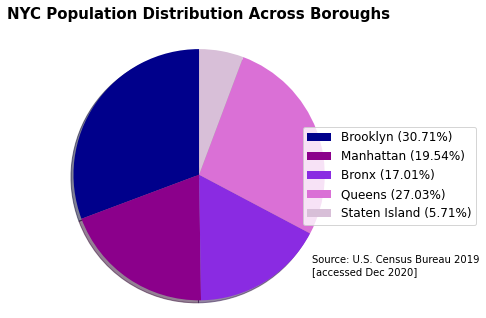

In [94]:
#pie chart of population of each borough, making up overall NYC population
x_values = boro['Borough']
y_values = boro['Population']

import matplotlib.pyplot as plt

percent = y_values / sum(y_values) * 100
label = [[] for i in range(len(x_values))]
for i in range(len(x_values)):
    label[i] = '{} ({:.2f}%)'.format(x_values[i],percent[i])

fig, axs = plt.subplots(figsize=(5, 5)) # change figure size here
pie = axs.pie(y_values, shadow=True, startangle=90, colors=['darkblue', 'darkmagenta', 'blueviolet', 'orchid', 'thistle'])
axs.axis('equal')
plt.legend(pie[0],label, bbox_to_anchor=(1.3,0.5), loc="center right", fontsize=12, 
           bbox_transform=plt.gcf().transFigure)
plt.title('NYC Population Distribution Across Boroughs',fontweight="bold", fontsize=15, pad=20)
plt.text(x = 0.9, y= -.7, s="Source: U.S. Census Bureau 2019")
plt.text(x=0.9, y=-.8, s="[accessed Dec 2020]")
plt.show()
plt.show()

In [95]:
#proportion of stops made in the Bronx
CI_prop(2331, 11008)

Sample proportion is: 0.21175508720930233
95% CI is: (0.2041228936575459, 0.21938728076105876)


In [96]:
#proportion of stops made in Queens 
CI_prop(1848, 11008)

Sample proportion is: 0.16787790697674418
95% CI is: (0.1608957089768661, 0.17486010497662227)
